# Statistical Learning Project-2-solutions

1. Import neccesary Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import copy
from scipy.stats import kurtosis, skew, stats
from math import sqrt
from numpy import mean, var

2.Read the data as data frame.

In [2]:
Insurance = pd.read_csv('insurance.csv')
Insurance.sample(10)

,age,sex,bmi,children,smoker,region,charges
835,42,male,35.97,2,no,southeast,7160.3303
1173,38,male,29.26,2,no,northwest,6457.8434
1108,26,male,30.00,1,no,southwest,2904.0880
1197,41,male,33.55,0,no,southeast,5699.8375
1079,63,male,33.66,3,no,southeast,15161.5344
23,34,female,31.92,1,yes,northeast,37701.8768
1217,29,male,37.29,2,no,southeast,4058.1161
1313,19,female,34.70,2,yes,southwest,36397.5760
16,52,female,30.78,1,no,northeast,10797.3362
783,50,female,27.60,1,yes,southwest,24520.2640


3.Basic EDA

(a).shape of data,(b).data type of each attribute ,(c1).checking the presence of null values.

In [3]:
print('Insurance data in terms of rows and columns , datatypes of every attribute and presence of null values in data')
print('\n')
Insurance.info()

Insurance data in terms of rows and columns , datatypes of every attribute and presence of null values in data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(c2).checking presence of missing values in terms of special characters in any of the column.

In [4]:
Insurance.age.unique() 

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [5]:
Insurance.sex.unique() 

array(['female', 'male'], dtype=object)

In [6]:
Insurance.bmi.unique() 

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [7]:
Insurance.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [8]:
Insurance.smoker.unique() 

array(['yes', 'no'], dtype=object)

In [9]:
Insurance.region.unique() 

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
Insurance.charges.unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [11]:
Insurance.apply(pd.Series.value_counts)

,age,sex,bmi,children,smoker,region,charges
0,NaN,NaN,NaN,574.0,NaN,NaN,NaN
1,NaN,NaN,NaN,324.0,NaN,NaN,NaN
2,NaN,NaN,NaN,240.0,NaN,NaN,NaN
3,NaN,NaN,NaN,157.0,NaN,NaN,NaN
4,NaN,NaN,NaN,25.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
northeast,NaN,NaN,NaN,NaN,NaN,324.0,NaN
northwest,NaN,NaN,NaN,NaN,NaN,325.0,NaN
southeast,NaN,NaN,NaN,NaN,NaN,364.0,NaN
southwest,NaN,NaN,NaN,NaN,NaN,325.0,NaN


no special characters or missing values found in Insurance data.

(d). five point summary of numerical attributes

In [12]:
Insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


(e),(f),(g).Distribution,presence of outliers and measure of skewness of ‘charges’, ‘bmi’ and ‘age’ columns.

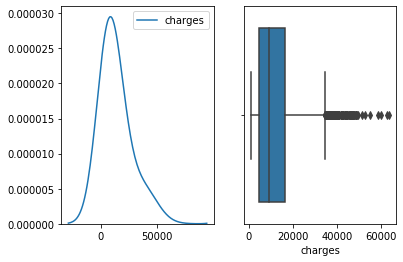

In [13]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(Insurance['charges'], bw=10000, ax=axes[0])
sns.boxplot(Insurance['charges'], ax=axes[1])
plt.show()

In [14]:
print(Insurance['charges'].describe())
print("skew:  {}".format(skew(Insurance['charges'])))
print("kurtosis:  {}".format(kurtosis(Insurance['charges'])))
print("missing charges values: {}".format(Insurance['charges'].isnull().sum()))

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
skew:  1.5141797118745743
kurtosis:  1.595821363956751
missing charges values: 0


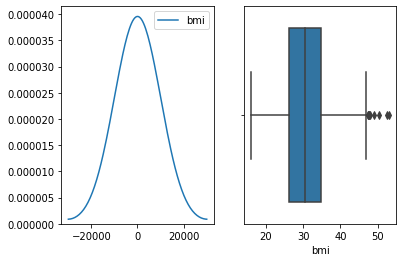

In [15]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(Insurance['bmi'], bw=10000, ax=axes[0])
sns.boxplot(Insurance['bmi'], ax=axes[1])
plt.show()

In [16]:
print(Insurance['bmi'].describe())
print("skew:  {}".format(skew(Insurance['bmi'])))
print("kurtosis:  {}".format(kurtosis(Insurance['bmi'])))
print("missing charges values: {}".format(Insurance['bmi'].isnull().sum()))

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
skew:  0.28372857291709386
kurtosis:  -0.05502310583700032
missing charges values: 0


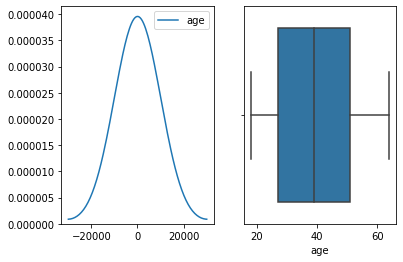

In [17]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(Insurance['age'], bw=10000, ax=axes[0])
sns.boxplot(Insurance['age'], ax=axes[1])
plt.show()

In [18]:
print(Insurance['age'].describe())
print("skew:  {}".format(skew(Insurance['age'])))
print("kurtosis:  {}".format(kurtosis(Insurance['age'])))
print("missing charges values: {}".format(Insurance['age'].isnull().sum()))

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
skew:  0.055610083072599126
kurtosis:  -1.2449206804584227
missing charges values: 0


Charges are considerably rightly skewed with values of skew = 1.5141797118745743 and has high number of outliers

Bmi is slightly rightly skewed with value of skew = 0.28372857291709386 and has few outliers

Age is almost normaly distribute with marginal skewness that can be ignored and value of skew for age = 0.055610083072599126 and has no outliers

(h). Distribution of categorical columns (include children)

In [19]:
Insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

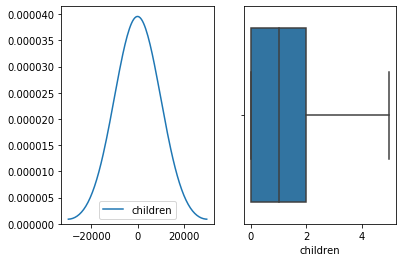

In [20]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(Insurance['children'], bw=10000, ax=axes[0])
sns.boxplot(Insurance['children'], ax=axes[1])
plt.show()

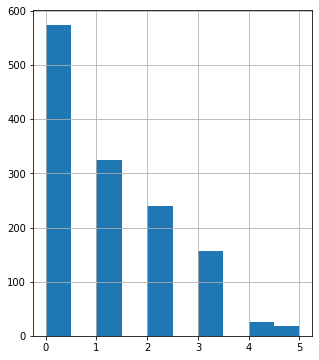

In [21]:
Insurance['children'].hist(figsize =(5,6))

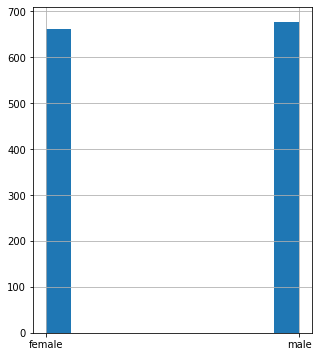

In [22]:
Insurance['sex'].hist(figsize =(5,6))

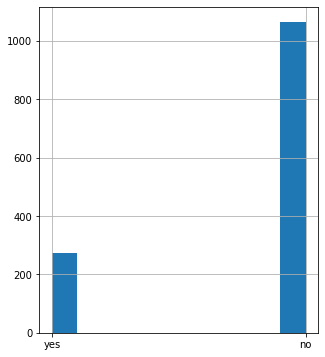

In [23]:
Insurance['smoker'].hist(figsize =(5,6))

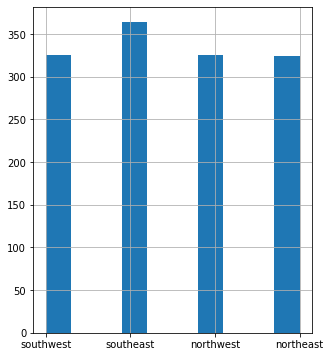

In [24]:
Insurance['region'].hist(figsize =(5,6))

There are more non-smokers than there are smokers in the data

Gender is almost evenly distributed

Regions are distributed evenly accross all regions excluding southern, southern is litle high

Most of them have less than 2 children and very few have 4 or 5 children

(i). Pair plot that includes all the columns of the data  frame 

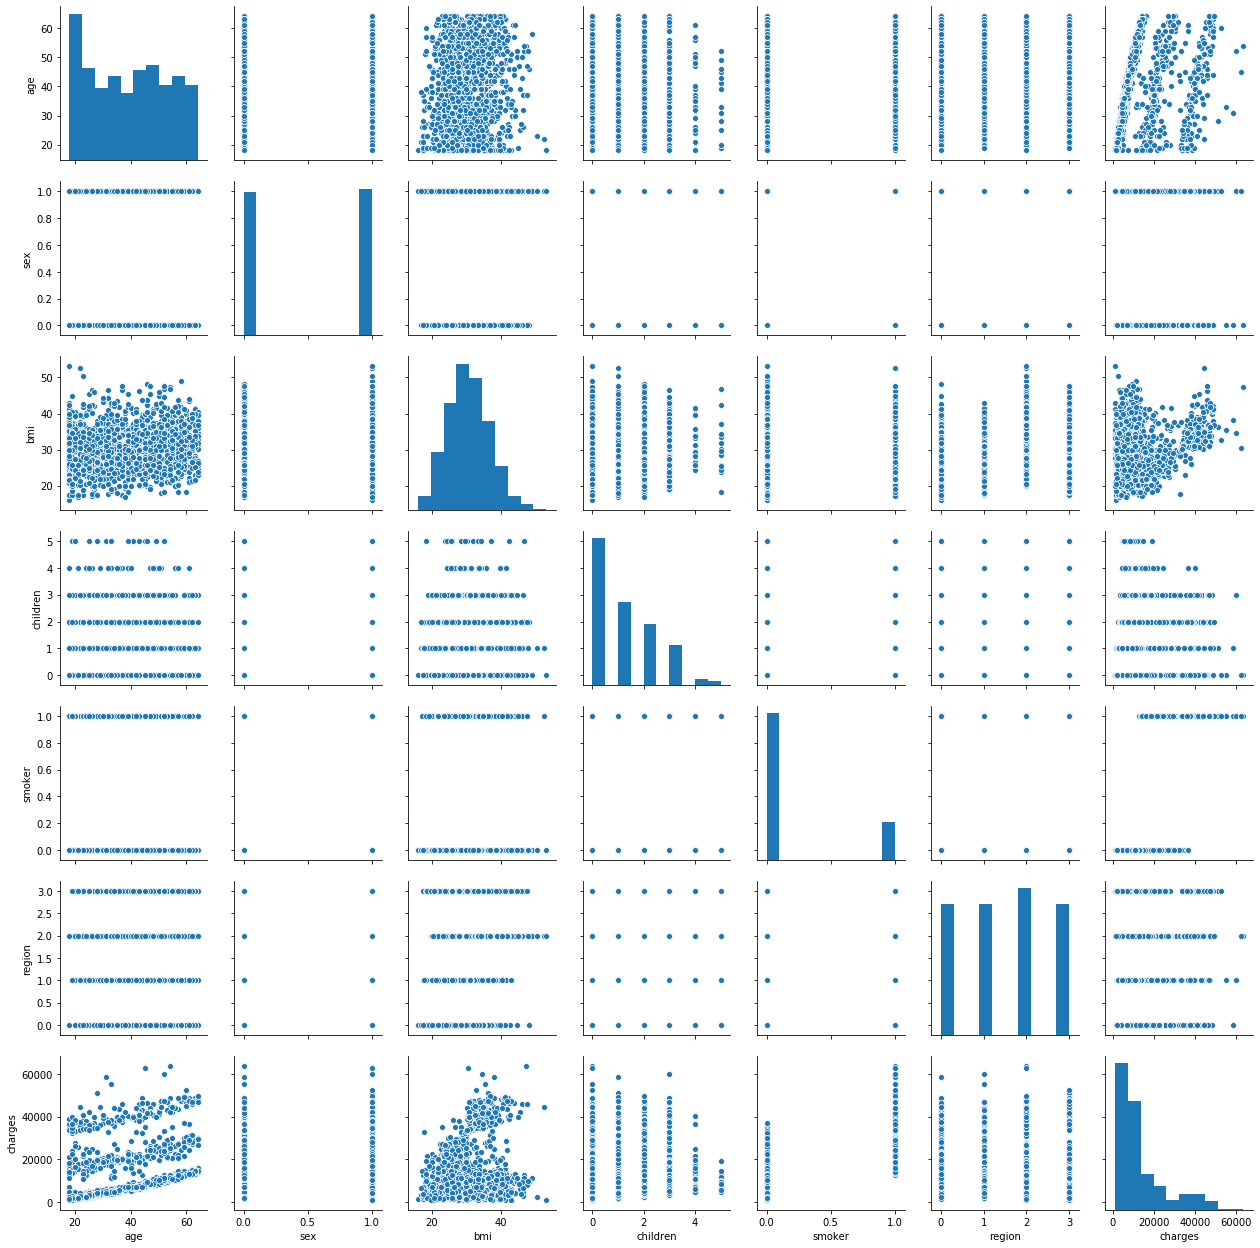

In [25]:
Insurance_encoded = copy.deepcopy(Insurance)
Insurance_encoded.loc[:,['sex', 'smoker', 'region']] = Insurance_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(Insurance_encoded)  #pairplot
plt.show()

# 4. Answer the following questions with statistical evidence

(a). Do charges of people who smoke differ significantly from the people who don't?

In [26]:
Insurance.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

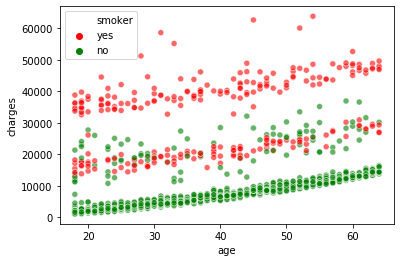

In [27]:
plt.figure()
sns.scatterplot(Insurance.age, Insurance.charges,hue=Insurance.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

The difference between charges of smokers and charges of non-smokers are clearly visible

In [28]:
Ho = "Charges of smoker and non-smoker are same"   #Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   #Alternate Hypothesis

x = np.array(Insurance[Insurance.smoker == 'yes'].charges)  #  smokers as an array
y = np.array(Insurance[Insurance.smoker == 'no'].charges) #  non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  # t-test


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


Smokers  claim significantly more money than non-smokers

In [29]:
Insurance.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

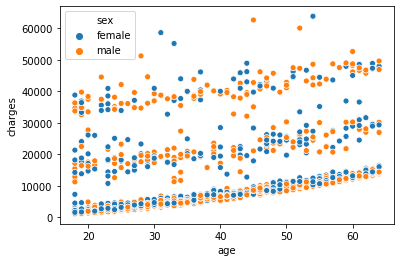

In [30]:
plt.figure()
sns.scatterplot(Insurance.age, Insurance.charges,hue=Insurance.sex )
plt.show()

Visually, there is no apparent relation between gender and charges

(b). Does bmi of males differ significantly from that of females?

In [31]:
Ho = "Gender has no effect on bmi"   #Null Hypothesis
Ha = "Gender has an effect on bmi"   #Alternate Hypothesis

x = np.array(Insurance[Insurance.sex == 'male'].bmi)  #bmi values to males as an array
y = np.array(Insurance[Insurance.sex == 'female'].bmi) #bmi values to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


(c). Is the proportion of smokers significantly different in different genders?

In [32]:
import scipy.stats as stats

In [33]:
Ho = "Gender has no effect on smoking habits"   #Null Hypothesis
Ha = "Gender has an effect on smoking habits"   #Alternate Hypothesis

crosstab = pd.crosstab(Insurance['sex'],Insurance['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
    

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [34]:
Ho = "No. of children has no effect on bmi"   #Null Hypothesis
Ha = "No. of children has an effect on bmi"   #Alternate Hypothesis


female_Insurance = copy.deepcopy(Insurance[Insurance['sex'] == 'female'])

zero = female_Insurance[female_Insurance.children == 0]['bmi']
one = female_Insurance[female_Insurance.children == 1]['bmi']
two = female_Insurance[female_Insurance.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
